In [121]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel, xlim, ylim, title, grid, legend, show
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')
from gaussxw import gaussxwab
from plotting import plotting

## Ejercicio 6: Rendijas de difracción.

Un rayo luz con longitud de onda $\gamma$ incide en unas rendijas de difracción de anchura total $w$, se difracta, es enfocada con una lente de longitud focal $f$ , y cae sobre una pantalla:

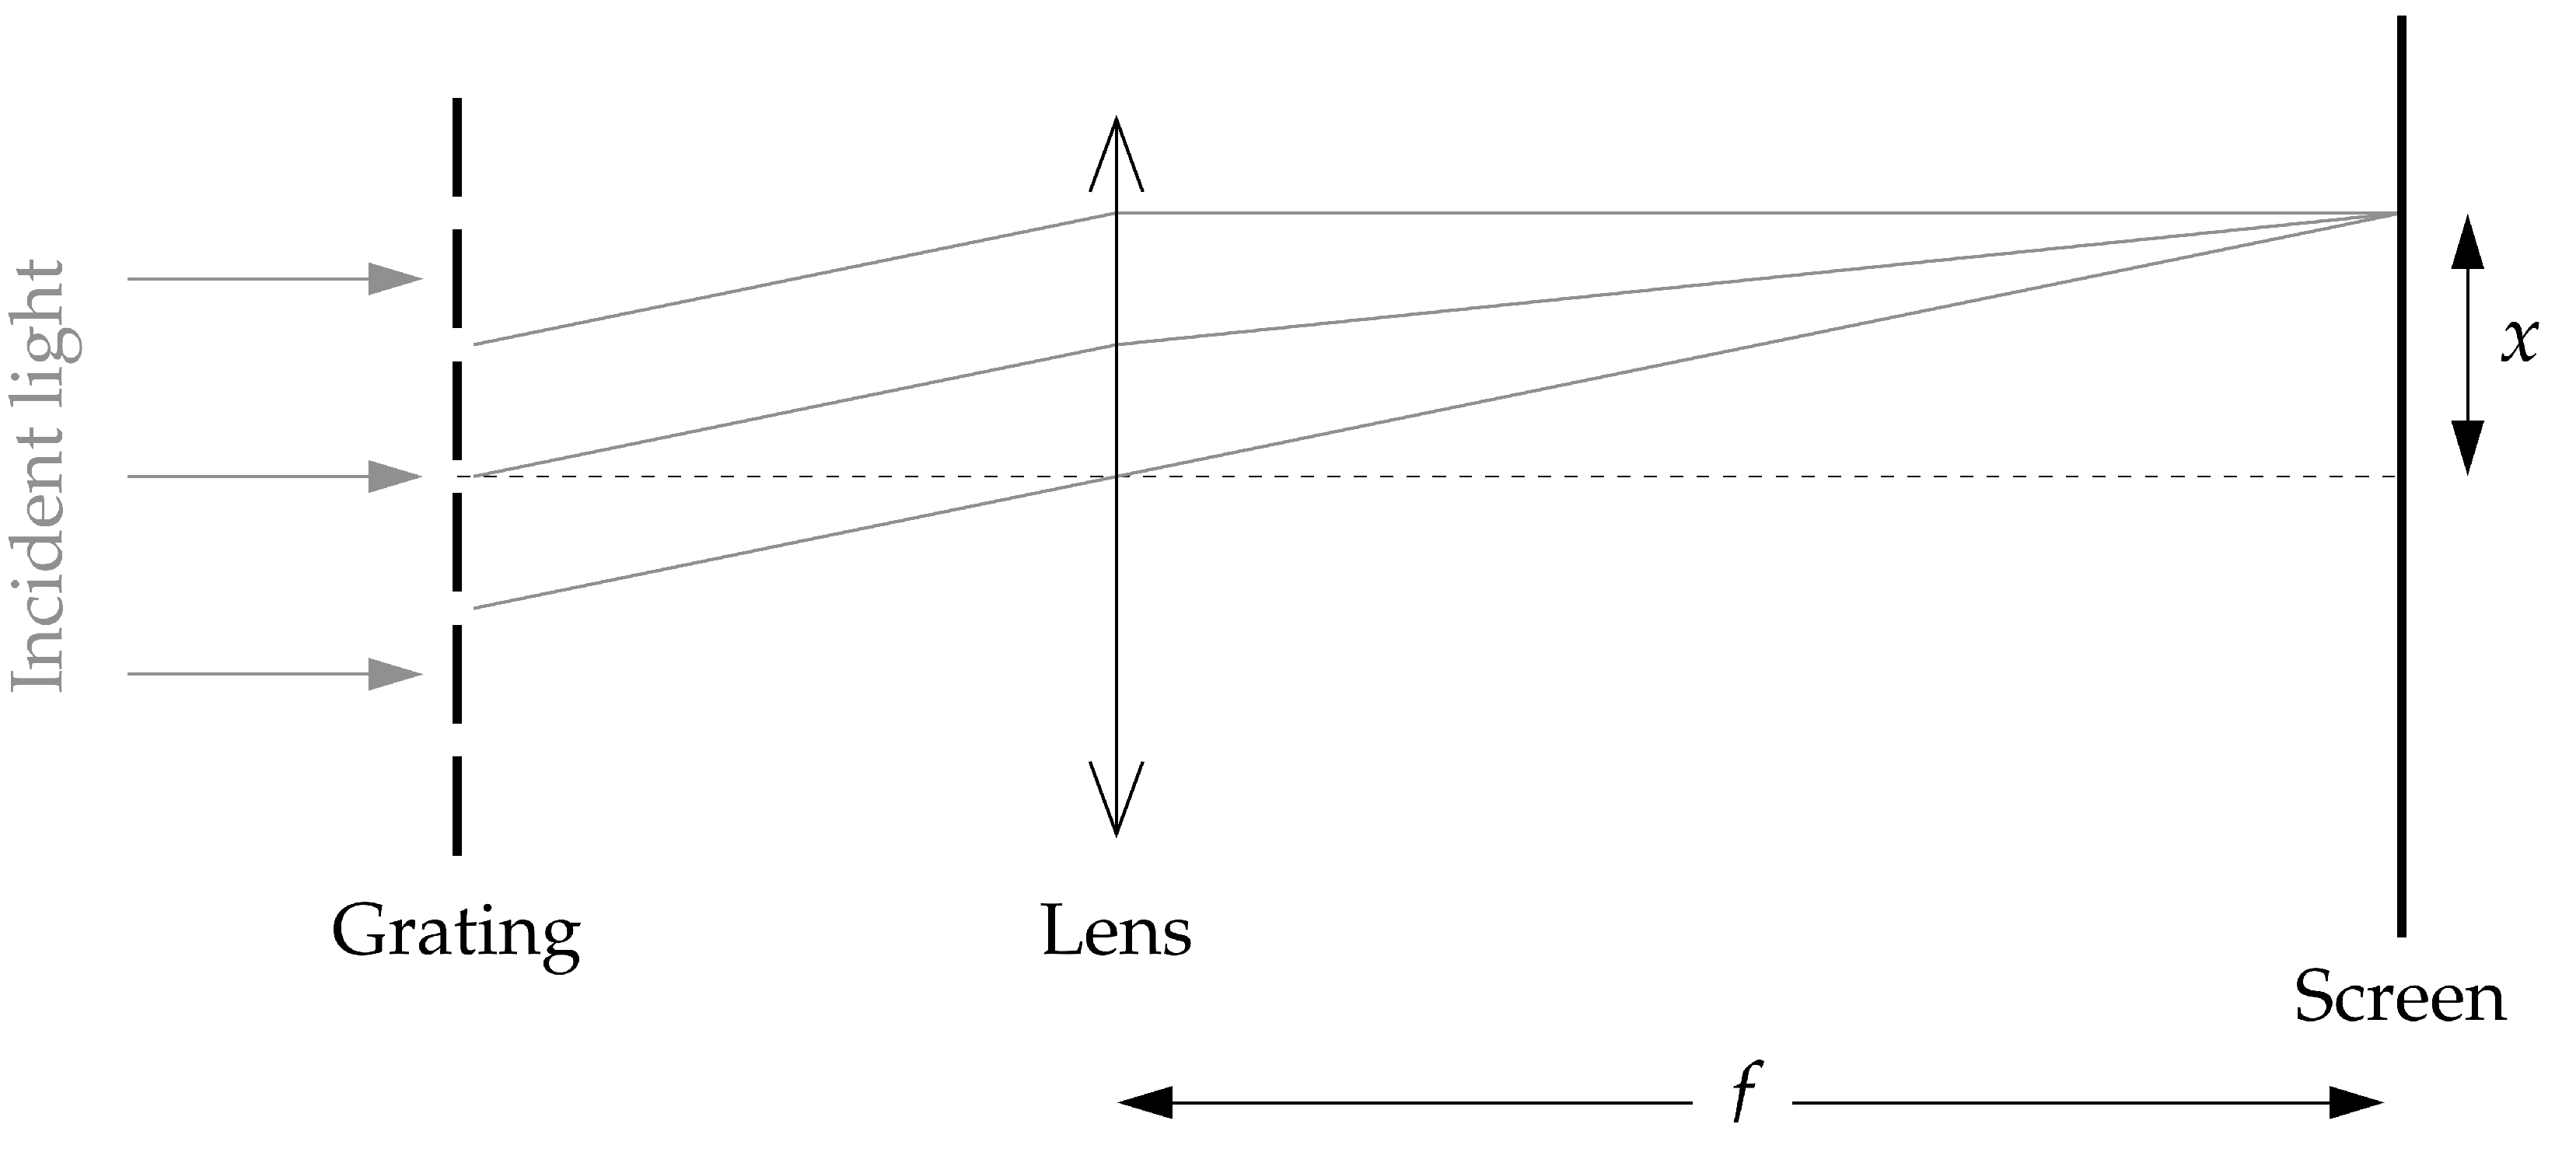

In [122]:
display(Image(filename ="light.png", width=450, height=450))

La teoría nos dice que la intensidad del patrón de difracción en la pantalla, a una distancia $x$ del eje central del sistema, viene dada por

$$I(x)=\left\vert\,\int_{-w/2}^{w/2}{\sqrt{q(u)}\,\text{e}^{i\,2\pi\,x\,u/\lambda\,f}\,\text{d}u}\,\right\vert,$$

donde $q(u)$ es la llamada función de transmisión de intensidad de la rejilla de difracción a una distancia $u$ del eje central, es decir, la fracción de la luz incidente que la rejilla deja pasar.

---

1. Considere una rejilla con función de transmisión $q(u) = \sin^2{\alpha\,u}$.   
    ¿Cuál es la separación de las "rendijas" de esta rejilla, expresada en términos de $\alpha$?



*Respuesta*:

Como la separación es periódica, el argumento del seno tiene período $\pi$, por lo que:

$$d = \frac{\pi}{\alpha}$$

---

2. Escribe una función en Python $q(u)$ que devuelva la función de transmisión $q(u)=\sin^2\alpha\,u$ como la anterior en la posición u para una rejilla cuyas rendijas tienen una separación de 20 $\mu m$.

---

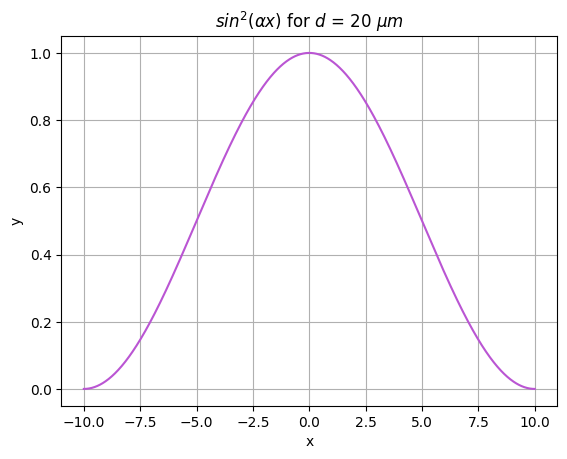

In [123]:
def q(u):
    d = 20e-6
    a = np.pi/d
    return np.sin(a*u)**2

d = 20e-6
a = np.pi/d
x = np.linspace(-10, 10, 1000)
y = q(x)
title(f'$sin^2(\\alpha x)$ for $d$ = {int(d*1e6)} $\\mu m$')
plotting(x, y)

3. Utiliza tu función en un programa para calcular y representar la intensidad del patrón de difracción producido por dicha rejilla que tiene diez rendijas en total, si la luz incidente tiene longitud de onda λ = 500 nm. Suponga que la lente tiene una distancia focal de 1 metro y la rejilla tiene 10 cm de ancho. Puedes utilizar el método que creas conveniente para hacer la integral. Una vez que Una vez que hayas hecho tu elección también tendrás que decidir el número de puntos de muestreo que vas a utilizar. ¿Qué criterios intervienen en esta decisión?

   Observa que el integrando en la ecuación de $I(x)$ es complejo, por lo que tendrás que utilizar variables complejas en su programa.      
   
---

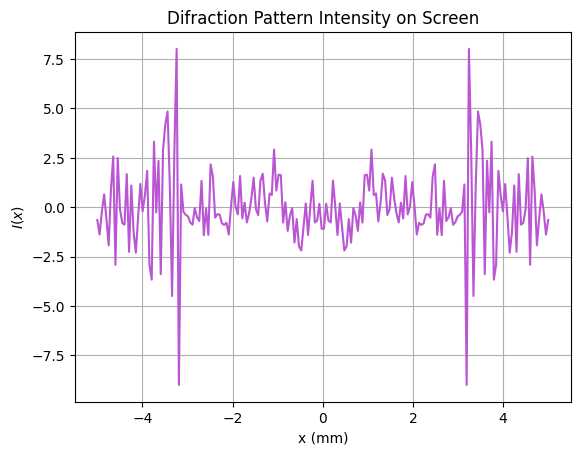

In [124]:
def I(x, q):
    l, f1, w, N= 500e-9, 1., 0.1, 1000

    ug, wg = gaussxwab(N, -w/2, w/2)

    def f(u, x):
        return np.sqrt(q(u))*np.exp(2*np.pi*1j*x*u/(l*f1))


    s = 0
    for i in range(len(ug)):
        s += wg[i]*f(ug[i], x)
    return s


x = np.linspace(-5e-3, 5e-3, 200)
y = I(x, q)

plot(x*1e3, y*1e3, color = 'mediumorchid')
title('Difraction Pattern Intensity on Screen')
xlabel('x (mm)')
ylabel("$I(x)$")
grid()
show()

4.  Representa cómo se vería el patrón de difracción en la pantalla usando un gráfico de densidad.

---

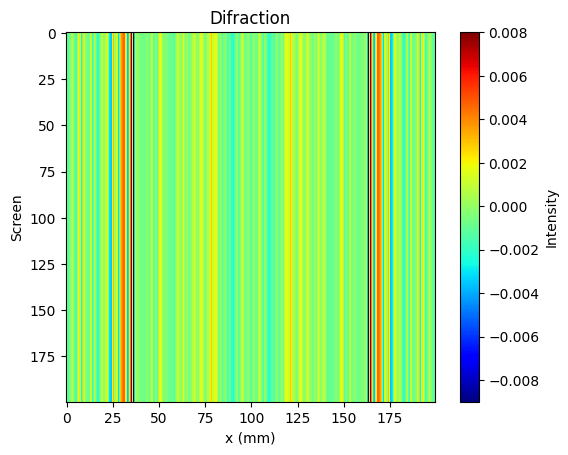

In [125]:
def density(I):
    N = len(I)
    matrix = np.ones([N, N])

    for i in range(N):
        matrix[i] = I
    return matrix

M = density(y)

plt.imshow(M, cmap = 'jet')
plt.xlabel("x (mm)")
plt.ylabel("Screen")
plt.title("Difraction")
plt.colorbar(label="Intensity")
plt.show()


5. e) Modifica tu programa para hacer imágenes de los patrones de difracción producidos por rejillas con los siguientes perfiles:

    * Un perfil de transmisión que obedece a $q(u)=\sin^2{αu}\sin^2{\beta u}$, con $\alpha$ como antes y el misma anchura total de la rejilla $w$, y $\beta = 12\alpha$.

    * Dos rendijas "cuadradas", es decir, rendijas con un 100% de transmisión a través de la rendija y un 0% transmisión en el resto. Calcule el patrón de difracción para las rendijas no idénticas, una de 10 μm de ancho y la otra de 20 μm, con una separación de 60 μm entre ambas.

---

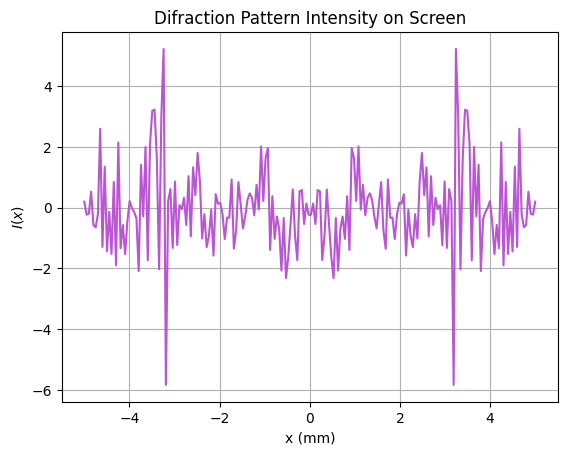

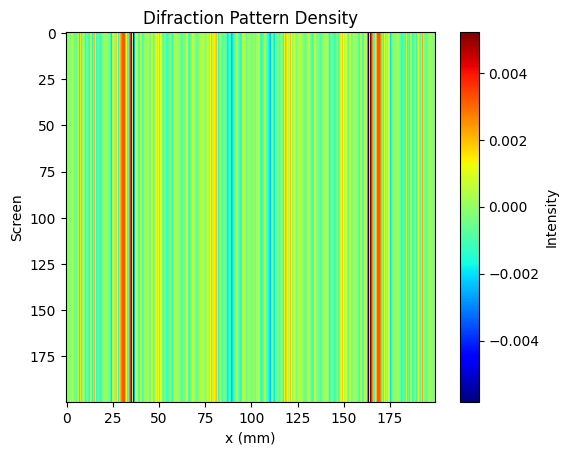

In [126]:
def q(u):
    d = 20e-6
    a = np.pi/d
    b = 12*a
    return (np.sin(a*u)*np.sin(b*u))**2

x = np.linspace(-5e-3, 5e-3, 200)
y = I(x, q)

plot(x*1e3, y*1e3, color = 'mediumorchid')
title('Difraction Pattern Intensity on Screen')
xlabel('x (mm)')
ylabel("$I(x)$")
grid()
show()

M = density(y)

plt.imshow(M, cmap = 'jet')
plt.xlabel("x (mm)")
plt.ylabel("Screen")
plt.title("Difraction Pattern Density")
plt.colorbar(label="Intensity")
plt.show()

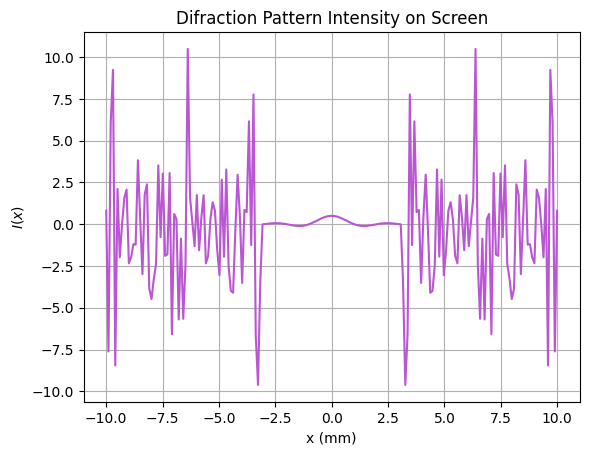

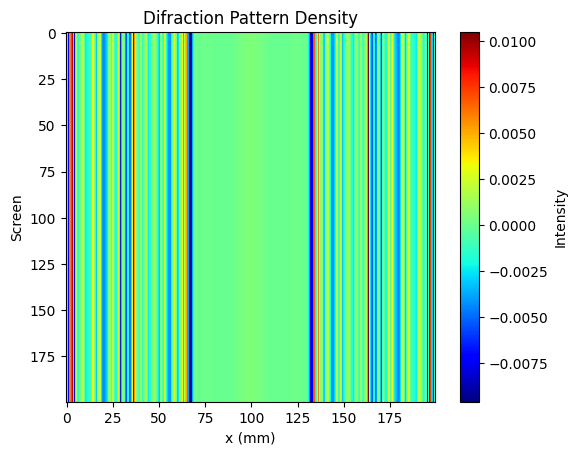

In [127]:
def I(x, q):
    l, f1, w, N= 500e-9, 1., 0.1, 1000

    ug, wg = gaussxwab(N, -w/2, w/2)

    def f(u, x):
        return np.sqrt(q(u))*np.exp(2*np.pi*1j*x*u/(l*f1))


    s = 0
    for i in range(len(ug)):
        s += wg[i]*f(ug[i], x)
    return s


def q_slits(u):
    q = np.zeros_like(u)
    
    # Rendija izquierda
    q[u < -35e-6] = 1
    
    # Rendija derecha
    q[u > 25e-6] = 1
    
    return q

x = np.linspace(-10e-3, 10e-3, 200)
y = I(x, q_slits)

plot(x*1e3, y*1e3, color = 'mediumorchid')
title('Difraction Pattern Intensity on Screen')
xlabel('x (mm)')
ylabel("$I(x)$")
grid()
show()

M = density(y)

plt.imshow(M, cmap = 'jet')
plt.xlabel("x (mm)")
plt.ylabel("Screen")
plt.title("Difraction Pattern Density")
plt.colorbar(label="Intensity")
plt.show()